# Initialization


In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

## Data Generation

### دوسری داده درست می کنیم با توزیع های مختلف#
### در واقعیت که ما از توزیع ورودی ها اطلاع نداریم بلکه بر اساس فیلد هدف ، داده ها را جدا کرده#
### سپس برای داده ها توزیع گوسی فرض می کنیم و پارامترهای توزیع را تخمین میزنیم

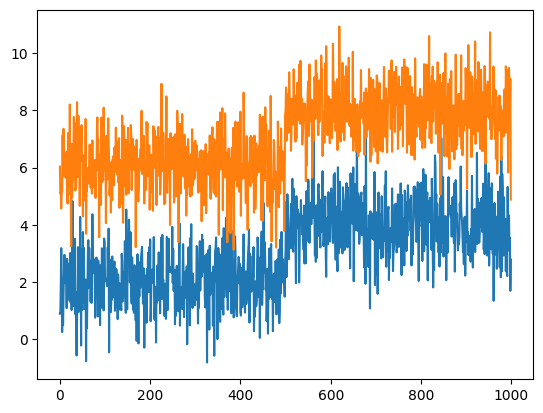

In [3]:
N = 1000
Xtrain_1_D1 = 2 + np.random.randn(N, 1)
Xtrain_1_D2 = 6 + np.random.randn(N, 1)
ytrain_1 = np.zeros((N, 1))
Xtrain_2_D1 = 4 + np.random.randn(N, 1)
Xtrain_2_D2 = 8 + np.random.randn(N, 1)
ytrain_2 = np.ones((N, 1))
Xtrain_1 = np.hstack((Xtrain_1_D1, Xtrain_1_D2))
Xtrain_2 = np.hstack((Xtrain_2_D1, Xtrain_2_D2))

X_train = np.vstack((Xtrain_1, Xtrain_2))
y_train = np.vstack((ytrain_1, ytrain_2))

Xtest_1_D1 = 2 + np.random.randn(int(N/2), 1)
Xtest_1_D2 = 6 + np.random.randn(int(N/2), 1)
ytest_1 = np.zeros((int(N/2), 1))
Xtest_2_D1 = 4 + np.random.randn(int(N/2), 1)
Xtest_2_D2 = 8 + np.random.randn(int(N/2), 1)
ytest_2 = np.ones((int(N/2), 1))

Xtest_1 = np.hstack((Xtest_1_D1, Xtest_1_D2))
Xtest_2 = np.hstack((Xtest_2_D1, Xtest_2_D2))
X_test = np.vstack((Xtest_1, Xtest_2))
y_test = np.vstack((ytest_1, ytest_2))
# داده آموزش و تست باید متعلق به یک توزیع آماری باشند.
plt.plot(X_test)

### biased and variance of estimate

### در اینجا میدونیم که توزیع داده های ما گوسی است ولی در واقعیت هیچ اطلاعی از توزیع داده ها نداریم.
### حالا باید پارامترهای توزیع داده ها را با فرض اینکه هیچی نمیدونیم ، گوسی فرض کرده و تخمین بزنیم.
### دو رویکرد برای تخمین میانگین و انحراف داشتیم. بیشینه شباهت و بیشته احتمال موخر
### که اینجا از روابط به دست آمده از بیشینه شباهت رفتیم.

In [4]:
def mean(X):
    return sum(X)/float(len(X))

# m = np.mean(X) ----> numpy method
def stdv(X):
    avg = mean(X)
    variance = []
    for i in range(len(avg)):
        variance.append(sum([(x - avg[i])**2 for x in X[:,i]])/float(len(X[:,i]) - 1))  # 1/(N-1))
    return np.sqrt(np.array(variance))
# std = np.std(X) 1/N

In [5]:
print(mean(Xtrain_1), np.mean(Xtrain_1,axis=0))

[1.98508744 6.02349873] [1.98508744 6.02349873]


In [6]:
print(stdv(Xtrain_1), np.std(Xtrain_1,axis=0)) # بین فرمول ما و فرمول پایتون یک تفاوت وجود داره.

[0.9997779  0.97194375] [0.99927789 0.97145766]


## Calculate the probability for each class

In [7]:
def calculate_probability(x, mean, stdev, prior): # P(w!x)
    exponent = math.exp(-((x-mean)**2 / (2 * stdev**2 )))
    return prior*(1 / (math.sqrt(2 * math.pi) * stdev)) * exponent

In [20]:
m1 = mean(Xtrain_1)
m2 = mean(Xtrain_2)
s1 = stdv(Xtrain_1)
s2 = stdv(Xtrain_2)
p = 0.5
y_pre = []
p1 = np.empty([X_test.shape[0], X_test.shape[1]]) # سر این قسمت پدرم در اومد
p2 = np.empty([X_test.shape[0], X_test.shape[1]])
print(X_test.shape)
print(p1.shape)
print("len(m1):",len(m1))
print("len(X_test):",len(X_test))
for i in range(len(m1)):
    for item in range(len(X_test)):
        p1[item,i] = calculate_probability(X_test[item,i],m1[i], s1[i], p)
        p2[item,i] = calculate_probability(X_test[item,i],m2[i], s2[i], 1-p)
print(p1[0,:])
print(np.mean(p1[0,:]))
for item in range(len(X_test)):
        if np.mean(p1[item,:]) > np.mean(p2[item,:]):
            y_pre.append(0)
        else:
            y_pre.append(1)

(1000, 2)
(1000, 2)
len(m1): 2
len(X_test): 1000
[0.10964254 0.20521881]
0.1574306733760703


### برای تصمیم گیری درباره رکورد تست، میانگین احتمال ورودی ها ، در اینجا دو ورودی، را میگیریم.

In [21]:
2*confusion_matrix(np.array(y_pre), y_test).T/len(y_test)


array([[0.882, 0.118],
       [0.116, 0.884]])